# Evaluation of the Results for known CPs with fixed target range w #
Notebook from https://github.com/ermshaua/time-series-segmentation-benchmark/blob/main/tssb/notebooks/competitor_evaluation.ipynb. Slightly edited.

In [40]:
import numpy as np
import pandas as pd

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import sys
sys.path.append("../../")

import orange3score
from tssb.utils import load_time_series_segmentation_datasets

Let's load the scores from the different methods.

In [41]:
df_ts = load_time_series_segmentation_datasets()
# selected_rows = df_ts[df_ts['window_size'] == 20]["dataset"].tolist()
# selected_rows = df_ts[df_ts['change_points'].apply(lambda lst: len(lst) == 3)]["dataset"].tolist()
selected_rows = df_ts[df_ts['time_series'].apply(lambda lst: len(lst) >= 8000 and len(lst) < 21000)]["dataset"].tolist()
print(len(selected_rows))

df_scores = pd.read_csv("./_segmentation_covering_known_stumpy_target_w_fluss_ALL.csv")
df_scores = df_scores[df_scores['dataset'].isin(selected_rows)]
df_scores


13


,dataset,flussOracle,fluss1,fluss2,fluss3,fluss4,fluss5,flussEnsSum,flussEnsMin
11,Computers,0.489950,0.493516,0.487437,0.489506,0.489950,0.476187,0.950555,0.493516
15,Crop,0.244522,0.247633,0.243803,0.244522,0.128839,0.156819,0.125741,0.247633
23,EOGVerticalSignal,0.169664,0.340074,0.169664,0.169664,0.169664,0.169664,0.339245,0.340074
24,FaceAll,0.401397,0.399217,0.401397,0.160531,0.167947,0.185458,0.257688,0.399217
25,FaceFour,0.795838,0.795087,0.795683,0.794636,0.795767,0.795838,0.516553,0.795087
28,Fish,0.367178,0.288193,0.363661,0.367178,0.143285,0.246144,0.285850,0.288193
29,FreezerRegularTrain,0.517146,0.519049,0.517146,0.515812,0.515890,0.513420,0.513614,0.519049
37,LargeKitchenAppliances,0.964806,0.923315,0.546649,0.433951,0.964806,0.598826,0.510327,0.877001
44,MiddlePhalanxOutlineAgeGroup,0.482822,0.331050,0.479932,0.482822,0.247536,0.479857,0.470493,0.331050
48,NonInvasiveFetalECGThorax1,0.337453,0.335010,0.335269,0.335311,0.337453,0.335282,0.339528,0.335010


Let's calculate the mean/median/std error.

In [42]:
for name in df_scores.columns[1:]:
    print(f"{name}: mean_error={np.round(df_scores[name].mean() * 100, 2)}")

flussOracle: mean_error=48.18
fluss1: mean_error=51.26
fluss2: mean_error=44.87
fluss3: mean_error=40.77
fluss4: mean_error=38.95
fluss5: mean_error=38.98
flussEnsSum: mean_error=42.17
flussEnsMin: mean_error=50.9


In [43]:
for name in df_scores.columns[1:]:
    print(f"{name}: median_error={np.round(df_scores[name].median() * 100, 2)}")

flussOracle: median_error=48.28
fluss1: median_error=41.44
fluss2: median_error=47.99
fluss3: median_error=41.47
fluss4: median_error=33.75
fluss5: median_error=40.81
flussEnsSum: median_error=40.24
flussEnsMin: median_error=41.44


In [44]:
for name in df_scores.columns[1:]:
    print(f"{name}: std_error={np.round(df_scores[name].std() * 100, 2)}")

flussOracle: std_error=21.23
fluss1: std_error=24.51
fluss2: std_error=15.8
fluss3: std_error=16.7
fluss4: std_error=26.11
fluss5: std_error=19.51
flussEnsSum: std_error=20.09
flussEnsMin: std_error=23.89


Let's compute the wins per method.

In [45]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

/tmp/ipykernel_56832/3065857076.py:1: FutureWarning: Dropping of nuisance columns in DataFrame.rank is deprecated; in a future version this will raise TypeError. Select only valid columns before calling rank.
  ranks = df_scores.rank(1, method = 'min', ascending=False)


In [46]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 1)}")


flussOracle:wins=6 rank=2.2
fluss1:wins=5 rank=3.0
fluss2:wins=1 rank=4.0
fluss3:wins=3 rank=4.8
fluss4:wins=1 rank=5.5
fluss5:wins=1 rank=5.7
flussEnsSum:wins=2 rank=5.2
flussEnsMin:wins=5 rank=3.1


Let's plot and output the ranks.

In [47]:
cd = orange3score.compute_CD(means, df_scores.shape[0])
orange3score.graph_ranks(avranks=means, names=df_scores.columns[1:], cd=cd, width=5, reverse=True, textspace=1.3, filename="./ranks_known_fixed_target_w.png")

In [48]:
for name, rank in zip(df_scores.columns[1:], means):
    print(f"{name}: rank={np.round(rank, 5)}")

flussOracle: rank=2.23077
fluss1: rank=3.0
fluss2: rank=4.0
fluss3: rank=4.76923
fluss4: rank=5.46154
fluss5: rank=5.69231
flussEnsSum: rank=5.15385
flussEnsMin: rank=3.07692


Let's compute wins/losses against the stumpy fluss algorithm (no dilation).

In [49]:
for rival in df_scores.columns[1:]:
    if rival == "fluss1": continue
    
    df_pair = df_scores[["fluss1", rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=True)
    
    wins = pair_ranks[(pair_ranks["fluss1"] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks["fluss1"] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks["fluss1"] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"fluss1 vs {rival}: (wins/losses/ties): {wins}/{losses}/{ties}")

fluss1 vs flussOracle: (wins/losses/ties): 7/6/0
fluss1 vs fluss2: (wins/losses/ties): 6/7/0
fluss1 vs fluss3: (wins/losses/ties): 4/9/0
fluss1 vs fluss4: (wins/losses/ties): 3/10/0
fluss1 vs fluss5: (wins/losses/ties): 3/10/0
fluss1 vs flussEnsSum: (wins/losses/ties): 3/10/0
fluss1 vs flussEnsMin: (wins/losses/ties): 0/1/12


/tmp/ipykernel_56832/4256861775.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/tmp/ipykernel_56832/4256861775.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


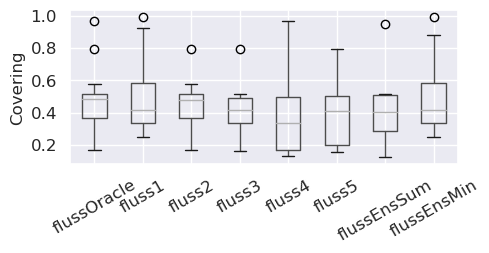

In [50]:
fontsize = 12
_, ax = plt.subplots(figsize=(5,2))

df_scores.boxplot(ax=ax, rot=30)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig(f"./boxplot_known_fixed_target_w.png", bbox_inches="tight")